## Heart Disease Prediction Model
The objective of this project is to build a machine learning model that will predict the risk of early heart disease from patient medical data

### Problem Statement

Rural communities face significant challenges in accessing quality healthcare due to insufficient hospitals, trained doctors, and diagnostic equipment. This hinders the detection and treatment of chronic diseases like heart disease, which require early diagnosis for effective management. Limited medical resources increase the risk of late detection, resulting in higher mortality rates and poorer health outcomes.

### Solution 

To address this issue, I developed a machine learning model to predict heart disease likelihood using basic, easily obtainable medical data such as age, blood pressure, cholesterol levels, and other vital signs. This aligns with SDG 3(Good Health and Well-being) aimed at ensuring healthy lives for all.

Integrating this model into rural healthcare systems, such as local clinics or mobile health units, will enable healthcare workers to conduct early risk assessments for heart disease. This can facilitate early intervention and treatment, reducing heart disease-related mortality and improving overall health outcomes in underserved areas. The solution will promote better health and support SDG 3’s target of reducing premature deaths from non-communicable diseases by enabling early diagnosis and preventive care, especially in rural areas.

#### Dataset Description
This dataset was gotten from UCI Machine Learning Repository, which has the following information of patients.

Age: age in years

Sex: sex;
1 = male,
0 = female

CP: chest pain type;
0= typical angina,
1= atypical angina,
2= non-anginal pain,
3= asymptomatic

Trestbps: resting blood pressure (in mm Hg on admission to the hospital)

Chol: serum cholestoral in mg/dl

FBS: (fasting blood sugar > 120 mg/dl);
1 = true,
0 = false

Restecg: resting electrocardiographic results;
0= normal,
1= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
2= showing probable or definite left ventricular hypertrophy by Estes' criteria

Thalach: maximum heart rate achieved

Exang: exercise induced angina;
1 = yes,
0 = no

Oldpeak = ST depression induced by exercise relative to rest

Slope: the slope of the peak exercise ST segment;
0= upsloping,
1= flat,
2= downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: A categorical variable related to thallium stress test;
0 = error (in the original dataset 0 maps to NaN's),
1 = fixed defect,
2 = normal,
3 = reversable defect

Target(result);
0 = no disease,
1 = disease

#### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Data Wrangling

In [10]:
df.shape

(1025, 14)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df.rename(columns={'age': 'Age',
                   'sex': 'Sex',
                  'cp': 'CP',
                  'trestbps': 'Trestbps',
                  'chol': 'Chol',
                  'fbs': 'FBS',
                  'restecg': 'Restecg',
                  'thalach': 'Thalach',
                  'exang': 'Exang',
                  'oldpeak': 'Oldpeak',
                  'slope': 'Slope',
                  'thal': 'Thal',
                  'ca': 'CA',
                  'target': 'Target'},
          inplace=True, errors='raise')

In [16]:
df.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
df.dtypes

Age           int64
Sex           int64
CP            int64
Trestbps      int64
Chol          int64
FBS           int64
Restecg       int64
Thalach       int64
Exang         int64
Oldpeak     float64
Slope         int64
CA            int64
Thal          int64
Target        int64
dtype: object

In [20]:
for i in df.columns:
    i = df.value_counts(i)
    print(f'\n\n\nvalues of {i}')




values of Age
58    68
57    57
54    53
59    46
52    43
56    39
51    39
62    37
60    37
44    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
53    26
43    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
38    12
68    12
40    11
71    11
69     9
37     6
34     6
29     4
74     3
76     3
77     3
Name: count, dtype: int64



values of Sex
1    713
0    312
Name: count, dtype: int64



values of CP
0    497
2    284
1    167
3     77
Name: count, dtype: int64



values of Trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
135     20
124     20
134     17
145     17
152     17
170     15
100     14
122     14
136     11
126     10
180     10
115      9
105      9
142      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
165      4
200      4
114      4
117      4
123      

##### Checking for missing values

In [23]:
df.isnull().sum().sort_values(ascending=False)

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
FBS         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Target      0
dtype: int64

##### Checking for inconsistencies in the columns

In [26]:
(df == '?').any()

Age         False
Sex         False
CP          False
Trestbps    False
Chol        False
FBS         False
Restecg     False
Thalach     False
Exang       False
Oldpeak     False
Slope       False
CA          False
Thal        False
Target      False
dtype: bool

##### Checking the distribution of male and female in the data

C:\Users\STUTERN\AppData\Local\Temp\ipykernel_15908\1300214040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


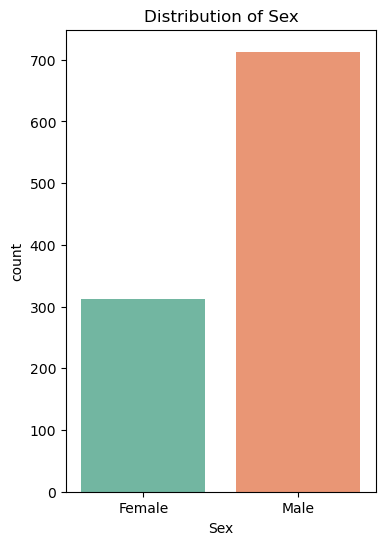

In [29]:
plt.figure(figsize=(4,6))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title("Distribution of Sex")

# Change x-axis labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

##### Plotting distribution of the target variable 'Heart Disease'

C:\Users\STUTERN\AppData\Local\Temp\ipykernel_15908\4172948036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='Set2')


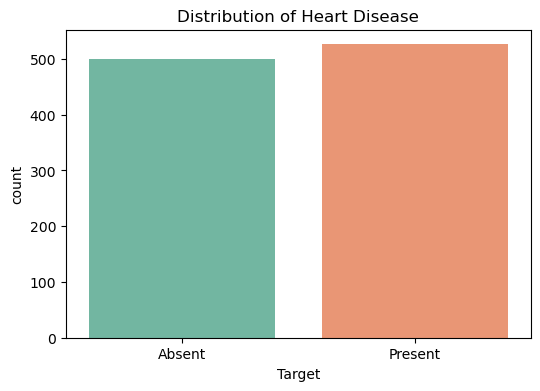

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df, palette='Set2')
plt.title("Distribution of Heart Disease")

# Change x-axis labels
plt.xticks([0, 1], ['Absent', 'Present'])
plt.show()

##### Plotting correlation matrix to examine relationships between the features

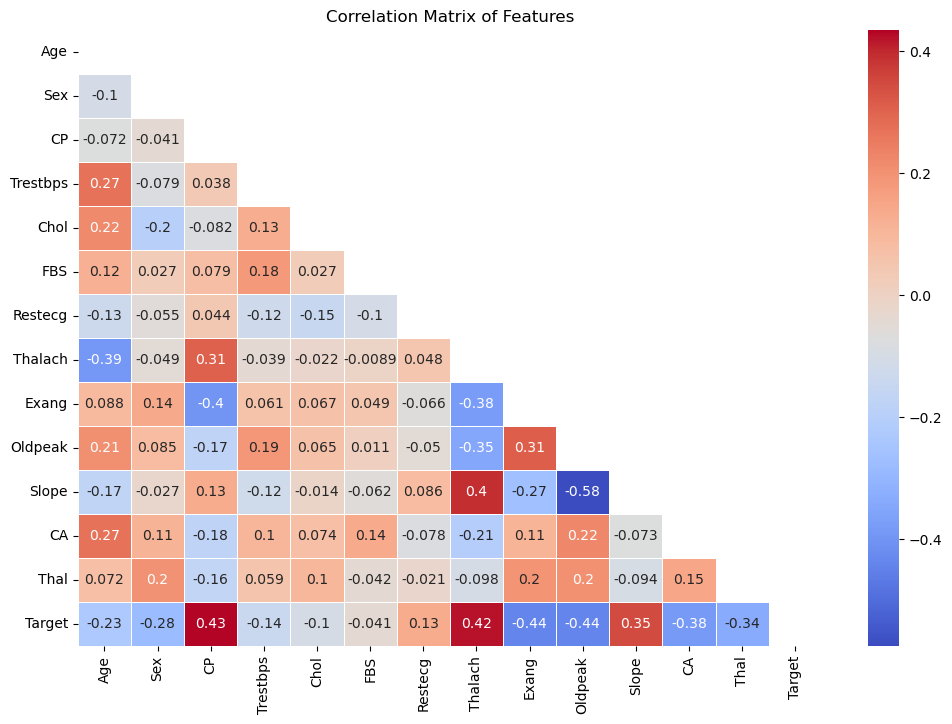

In [35]:
# using the upper triangle matrix as mask 
matrix = np.triu(df.corr())

plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix of Features")
plt.show()

### Data Preprocessing

In [38]:
df.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### Making a copy of my dataset

In [41]:
df_copy = df.copy()

In [43]:
df

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


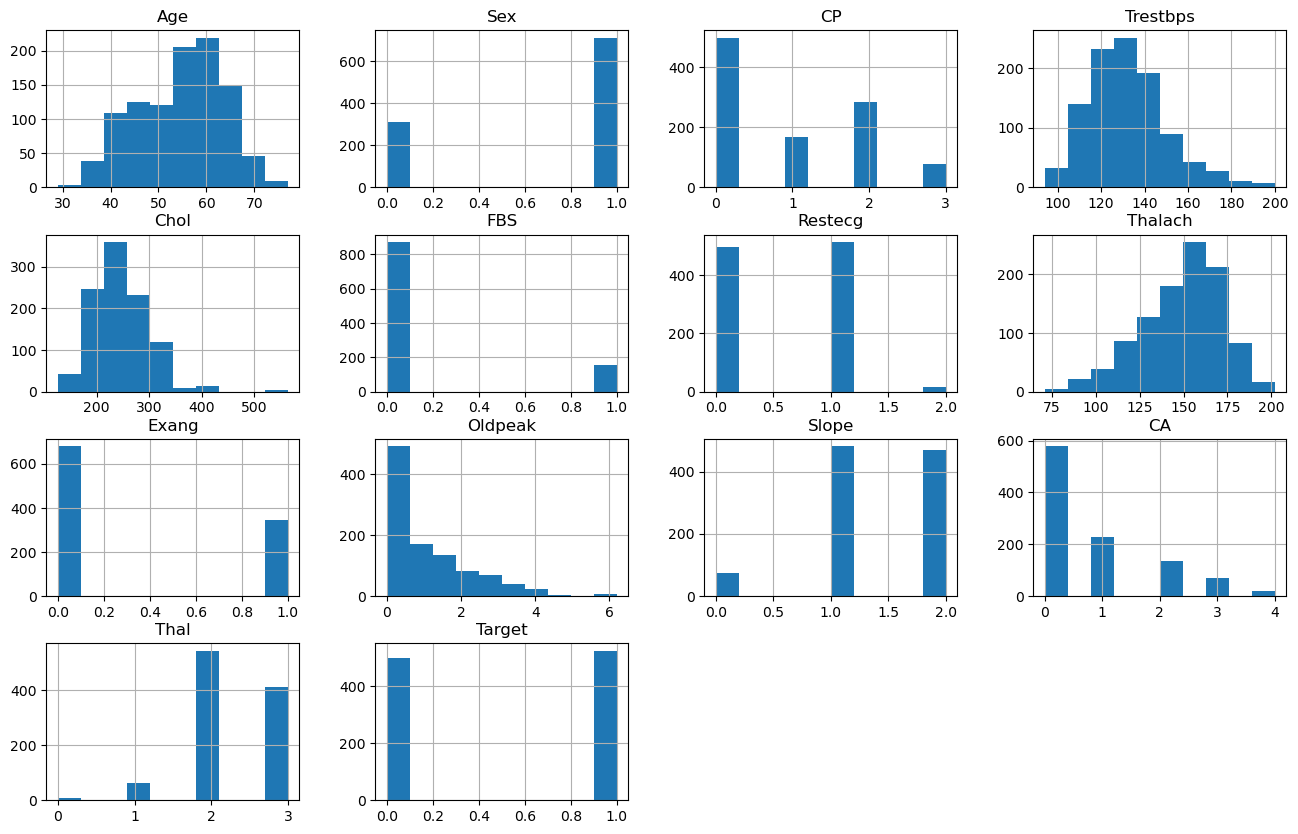

In [45]:
df.hist(figsize=[16,10]);

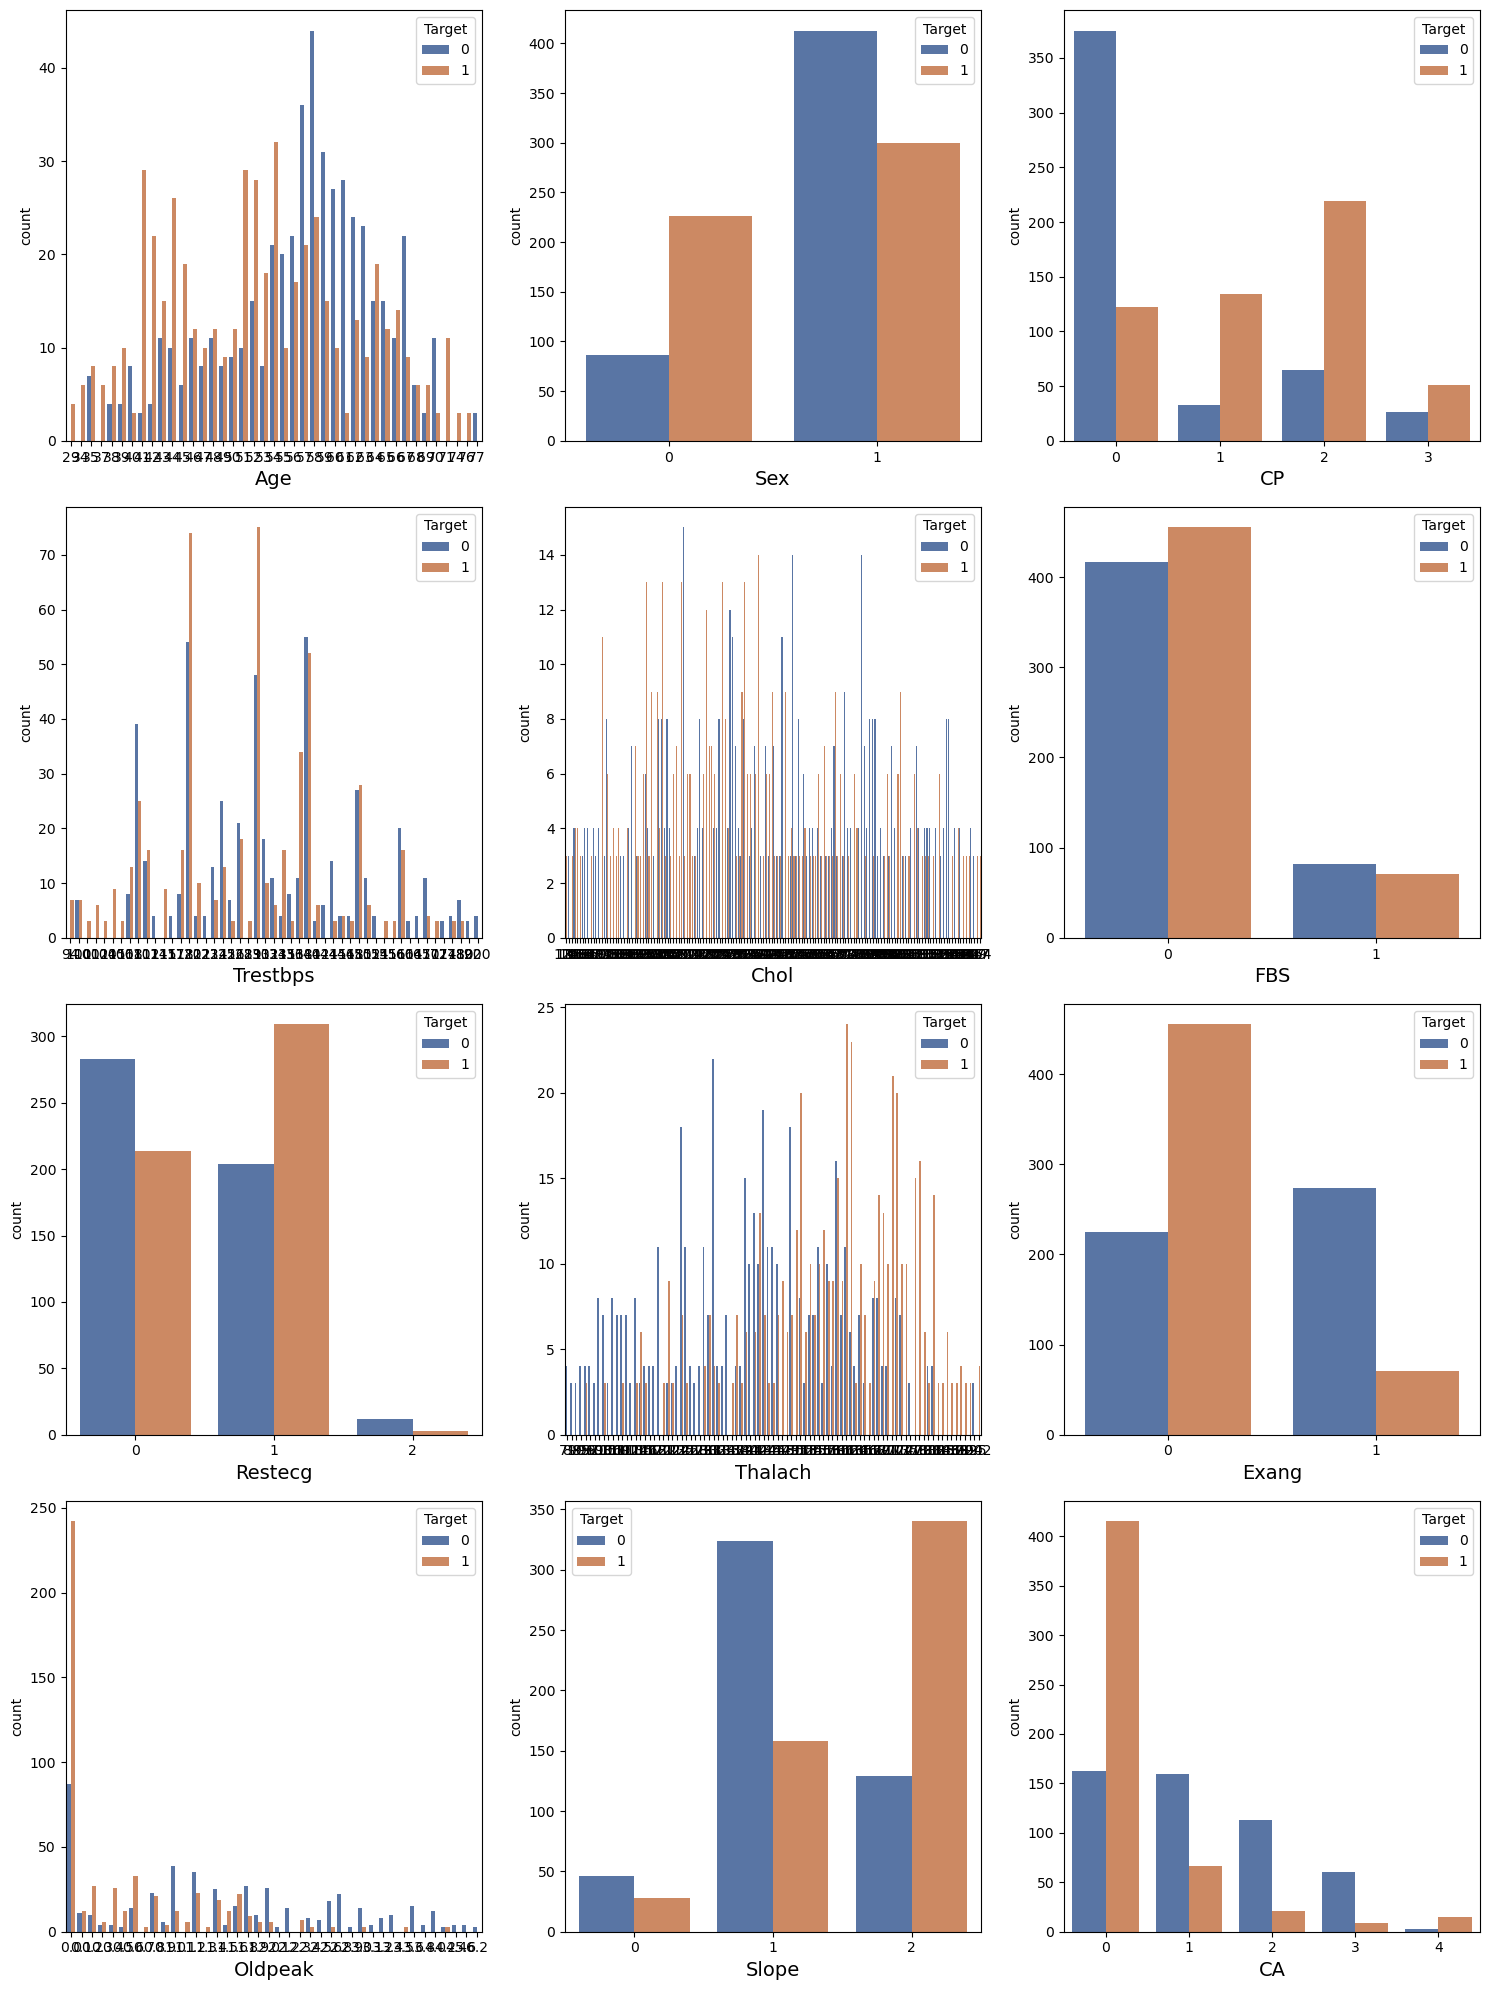

In [46]:
cat = df.columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
for i, ax in zip(cat[:-1], axes.flatten()):
    sns.countplot(x=i, hue='Target', data=df, palette='deep', ax=ax)
    ax.set_xlabel(i, fontsize=14)
plt.tight_layout()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1025 non-null   int64  
 1   Sex       1025 non-null   int64  
 2   CP        1025 non-null   int64  
 3   Trestbps  1025 non-null   int64  
 4   Chol      1025 non-null   int64  
 5   FBS       1025 non-null   int64  
 6   Restecg   1025 non-null   int64  
 7   Thalach   1025 non-null   int64  
 8   Exang     1025 non-null   int64  
 9   Oldpeak   1025 non-null   float64
 10  Slope     1025 non-null   int64  
 11  CA        1025 non-null   int64  
 12  Thal      1025 non-null   int64  
 13  Target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [51]:
df.describe()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Engineering

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [57]:
df.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
df.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [61]:
df.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Target'],
      dtype='object')

In [63]:
# Prepare features and target
X = df[['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal']]
y = df['Target']

In [65]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#Logistic Regression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Random Forest Classifier
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# Gradient Boosting Classifier
model_3 = GradientBoostingClassifier()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

# Support Vector Classifier (SVC)
model_4 = SVC()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

# Function to print metrics for each model
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Print metrics for each model
print_metrics(y_test, y_pred_1, "Logistic Regression")
print_metrics(y_test, y_pred_2, "Random Forest Classifier")
print_metrics(y_test, y_pred_3, "Gradient Boosting Classifier")
print_metrics(y_test, y_pred_4, "Support Vector Classifier")


Metrics for Logistic Regression:
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79
Confusion Matrix:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Metrics for Random Forest Classifier:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:
[[102   0]
 [  3 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Metrics for Gradient Boostin

### Saving the Model and Scaler object for deployment

In [81]:
import joblib

In [83]:
joblib.dump(model_2, 'random_forest.joblib')
print("Random Forest model has been saved successfully as random_forest_model.joblib")

Random Forest model has been saved successfully as random_forest_model.joblib


In [85]:
scaler_name = 'scaler.joblib'
joblib.dump(scaler, scaler_name)
print("Scaler has been saved successfully as scaler_object.joblib")

Scaler has been saved successfully as scaler_object.joblib
